In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("credit_card.csv")

In [3]:
required = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
           'Education_Level', 'Marital_Status','Income_Category',
           'Credit_Limit',"Total_Trans_Amt",
           "Avg_Open_To_Buy", "Total_Trans_Ct","Months_on_book"]
df= df[required]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Total_Trans_Amt,Avg_Open_To_Buy,Total_Trans_Ct,Months_on_book
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,12691.0,1144,11914.0,42,39
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,8256.0,1291,7392.0,33,44
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,3418.0,1887,3418.0,20,36
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,3313.0,1171,796.0,20,34
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,4716.0,816,4716.0,28,21


In [6]:
df_reg = df[["Credit_Limit","Total_Trans_Amt","Avg_Open_To_Buy", "Customer_Age",'Education_Level']]
df_reg

,Credit_Limit,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Education_Level
0,12691.0,1144,11914.0,45,High School
1,8256.0,1291,7392.0,49,Graduate
2,3418.0,1887,3418.0,51,Graduate
3,3313.0,1171,796.0,40,High School
4,4716.0,816,4716.0,40,Uneducated
...,...,...,...,...,...
10122,4003.0,15476,2152.0,50,Graduate
10123,4277.0,8764,2091.0,41,Unknown
10124,5409.0,10291,5409.0,44,High School
10125,5281.0,8395,5281.0,30,Graduate


C:\Users\manal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


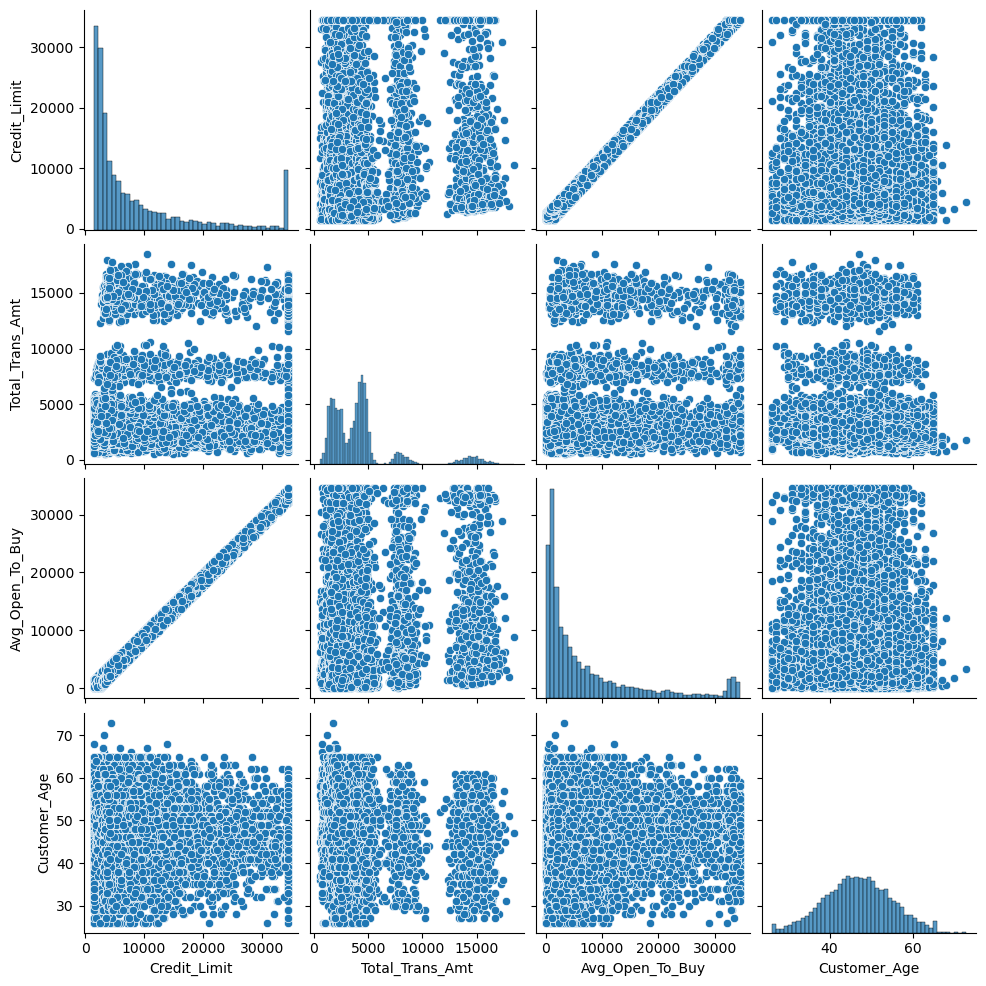

In [7]:
sns.pairplot(df_reg)

## TTEST ON TWO DIFFERENT GROUP
* CUSTOMER WITH CREDIT LIMIT BETWEEN 7000 AND 10,000
* CUSTOMER WITH CREDIT LIMIT BETWEEN 2000 AND 5000

In [10]:
group_a=df_reg[(df_reg["Credit_Limit"] < 10000) & (df_reg["Credit_Limit"] >7000)].sample(1000)

In [11]:
group_b=df_reg[(df_reg["Credit_Limit"] < 5000) & (df_reg["Credit_Limit"] >2000)].sample(1000)

In [12]:
group_b

,Credit_Limit,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Education_Level
4663,3276.0,4345,945.0,38,Unknown
4775,2286.0,4321,645.0,51,High School
2753,3161.0,1547,1772.0,55,Graduate
4512,2650.0,4512,1004.0,39,Graduate
4271,2189.0,4530,356.0,35,High School
...,...,...,...,...,...
1417,2700.0,2901,480.0,39,Graduate
1409,2937.0,2171,2068.0,34,High School
8384,2721.0,5443,2721.0,55,Graduate
6360,2267.0,4249,984.0,46,Graduate


<Axes: xlabel='Credit_Limit', ylabel='Total_Trans_Amt'>

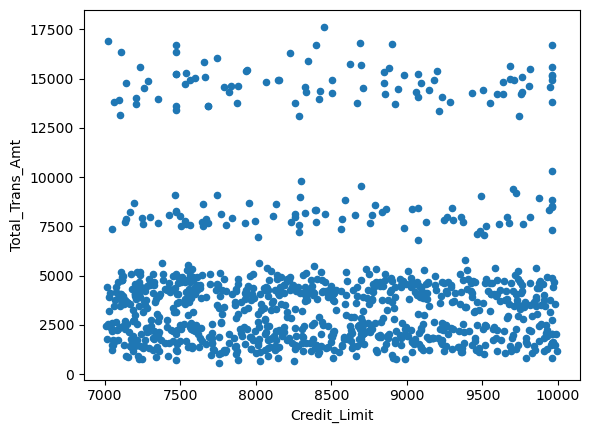

In [13]:
group_a.plot(x="Credit_Limit", y="Total_Trans_Amt",kind="scatter")

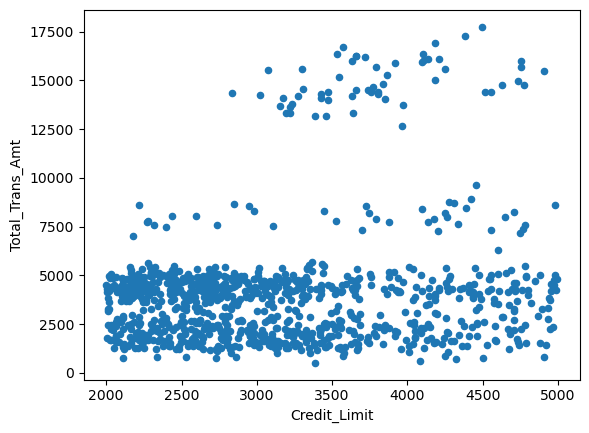

In [15]:
group_b.plot(x="Credit_Limit", y="Total_Trans_Amt",kind="scatter")
## if you decrease the customer's credit limit, their total trasaction amount will significally change.
plt.show()

<Axes: ylabel='Frequency'>

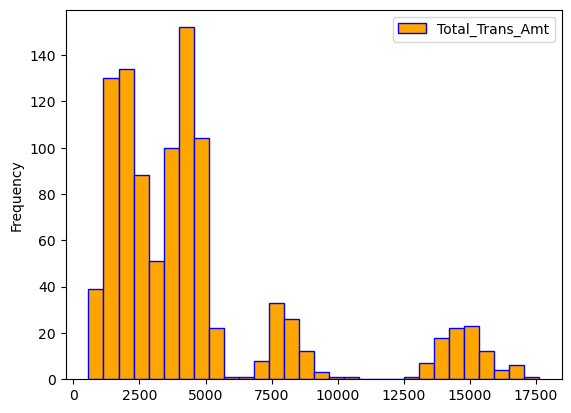

In [16]:
group_a.plot(y = "Total_Trans_Amt", kind = "hist", bins = 30, color = "orange",edgecolor = "blue")

<Axes: ylabel='Frequency'>

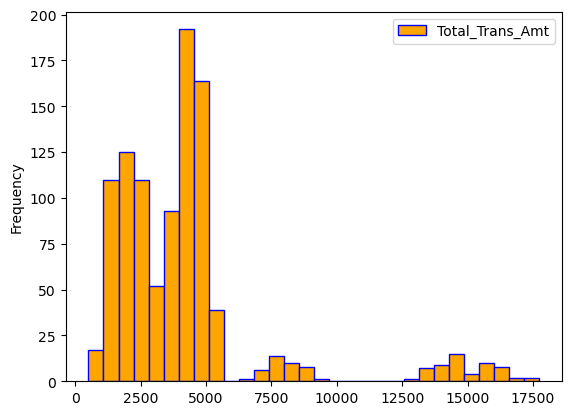

In [17]:
group_b.plot(y = "Total_Trans_Amt", kind = "hist", bins = 30, color = "orange",edgecolor = "blue")

In [19]:
t_stat, p_value = st.ttest_ind(group_a["Total_Trans_Amt"], 
                                  group_b["Total_Trans_Amt"])
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between the Total_Trans_Amt of Group a and Group b.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the Total_Trans_Amt of Group a and Group b.")

Reject the null hypothesis; there is a significant difference between the Total_Trans_Amt of Group a and Group b.


In [20]:
print(p_value)

0.011859699594234439


## Anova


In [24]:
df_reg["bins"]= pd.cut(x = df_reg["Credit_Limit"], 
                      bins = [2000,5000,8000,11000,14000,17000,20000]
                     )
df_reg

C:\Users\manal\AppData\Local\Temp\ipykernel_16280\3159856936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg["bins"]= pd.cut(x = df_reg["Credit_Limit"],


,Credit_Limit,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Education_Level,bins
0,12691.0,1144,11914.0,45,High School,"(11000, 14000]"
1,8256.0,1291,7392.0,49,Graduate,"(8000, 11000]"
2,3418.0,1887,3418.0,51,Graduate,"(2000, 5000]"
3,3313.0,1171,796.0,40,High School,"(2000, 5000]"
4,4716.0,816,4716.0,40,Uneducated,"(2000, 5000]"
...,...,...,...,...,...,...
10122,4003.0,15476,2152.0,50,Graduate,"(2000, 5000]"
10123,4277.0,8764,2091.0,41,Unknown,"(2000, 5000]"
10124,5409.0,10291,5409.0,44,High School,"(5000, 8000]"
10125,5281.0,8395,5281.0,30,Graduate,"(5000, 8000]"


In [25]:
a = df_reg[df_reg["bins"] == pd.Interval(left = 2000, right = 5000)].sample(280)
b = df_reg[df_reg["bins"] == pd.Interval(left = 5000, right = 8000)].sample(280)
c = df_reg[df_reg["bins"] == pd.Interval(left = 8000, right = 11000)].sample(280)
d = df_reg[df_reg["bins"] == pd.Interval(left = 11000, right = 14000)].sample(280)
e = df_reg[df_reg["bins"] == pd.Interval(left = 14000, right = 17000)].sample(280)
f = df_reg[df_reg["bins"] == pd.Interval(left = 17000, right = 20000)].sample(280)

In [26]:
a

,Credit_Limit,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Education_Level,bins
5244,2778.0,4515,2035.0,54,Doctorate,"(2000, 5000]"
6534,2811.0,2245,407.0,41,High School,"(2000, 5000]"
7939,3481.0,4556,2878.0,59,College,"(2000, 5000]"
5822,3069.0,4351,1587.0,50,Unknown,"(2000, 5000]"
1283,2463.0,2171,712.0,37,Graduate,"(2000, 5000]"
...,...,...,...,...,...,...
4890,4783.0,2870,2266.0,61,Doctorate,"(2000, 5000]"
6987,2918.0,4454,1321.0,45,Uneducated,"(2000, 5000]"
8413,2168.0,4043,834.0,46,College,"(2000, 5000]"
5370,2579.0,4300,620.0,40,High School,"(2000, 5000]"


In [27]:
f

,Credit_Limit,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Education_Level,bins
3656,18410.0,3778,17436.0,45,High School,"(17000, 20000]"
8653,18341.0,7584,17281.0,47,Doctorate,"(17000, 20000]"
720,18226.0,1681,16379.0,38,College,"(17000, 20000]"
4004,18570.0,4036,16678.0,42,Uneducated,"(17000, 20000]"
2585,19063.0,3393,17827.0,53,Post-Graduate,"(17000, 20000]"
...,...,...,...,...,...,...
3586,18584.0,3504,16138.0,40,Graduate,"(17000, 20000]"
6313,17285.0,4787,15432.0,49,Graduate,"(17000, 20000]"
4511,18550.0,2616,18550.0,63,Graduate,"(17000, 20000]"
4282,18075.0,1477,18075.0,49,Uneducated,"(17000, 20000]"


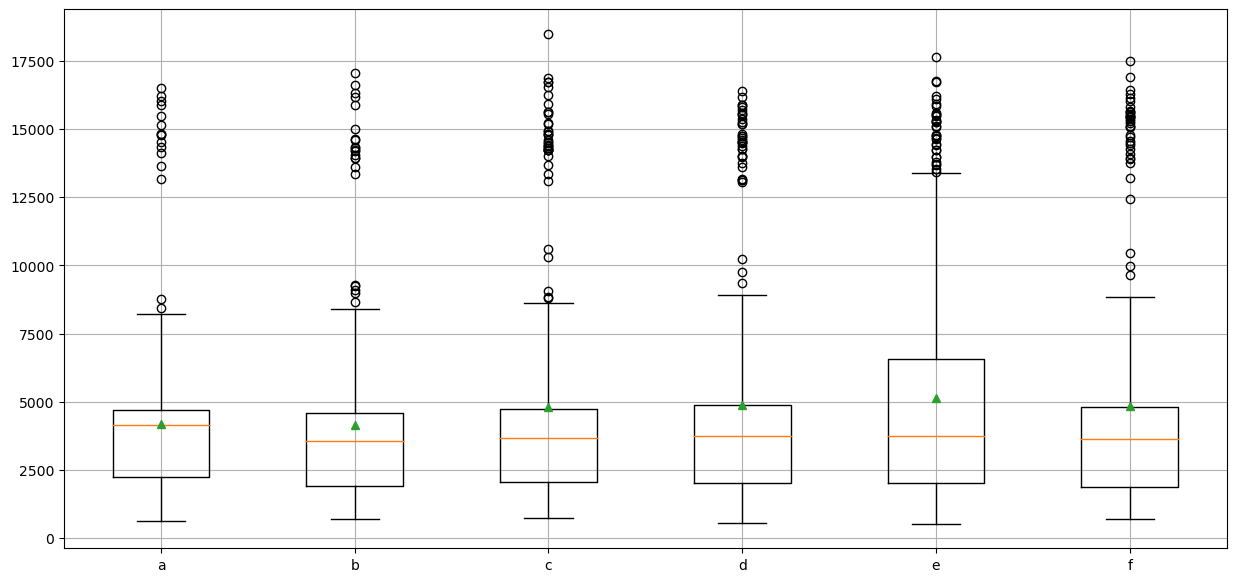

In [33]:
plt.figure(figsize=(15,7))
plt.boxplot([a["Total_Trans_Amt"].values,
             b["Total_Trans_Amt"].values,
             c["Total_Trans_Amt"].values,
             d["Total_Trans_Amt"].values,
             e["Total_Trans_Amt"].values,
             f["Total_Trans_Amt"].values],showmeans=True)
plt.xticks(range(1,7), list("abcdef"))
plt.grid()
#plt.ylim(3000, 5000)
plt.show()
# Anvoa is an extension of the ttest, the distribution is significally different because the mean value is different in six different
# groups and outlier group (Q3+1.5IQR) is different. So, these six groups has sigificant difference. 

## CHI SQUARE TEST

In [35]:
df_ex =df[df["Attrition_Flag"] == "Existing Customer"]
df_at = df[df["Attrition_Flag"] != "Existing Customer"]

In [36]:
df_ex

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Total_Trans_Amt,Avg_Open_To_Buy,Total_Trans_Ct,Months_on_book
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,12691.0,1144,11914.0,42,39
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,8256.0,1291,7392.0,33,44
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,3418.0,1887,3418.0,20,36
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,3313.0,1171,796.0,20,34
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,4716.0,816,4716.0,28,21
...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,Existing Customer,46,M,College,Single,$80K - $120K,13187.0,15354,10946.0,112,36
10117,712503408,Existing Customer,57,M,Graduate,Married,$80K - $120K,17925.0,17498,16016.0,111,40
10120,710841183,Existing Customer,54,M,High School,Single,$60K - $80K,13940.0,15577,11831.0,114,34
10121,713899383,Existing Customer,56,F,Graduate,Single,Less than $40K,3688.0,14596,3082.0,120,50


In [37]:
df_at

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Total_Trans_Amt,Avg_Open_To_Buy,Total_Trans_Ct,Months_on_book
21,708508758,Attrited Customer,62,F,Graduate,Married,Less than $40K,1438.3,692,1438.3,16,49
39,708300483,Attrited Customer,66,F,Doctorate,Married,Unknown,7882.0,704,7277.0,16,56
51,779471883,Attrited Customer,54,F,Graduate,Married,Less than $40K,1438.3,705,630.3,19,40
54,714374133,Attrited Customer,56,M,Graduate,Married,$120K +,15769.0,602,15769.0,15,36
61,712030833,Attrited Customer,48,M,Graduate,Married,$60K - $80K,34516.0,691,34516.0,15,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,Uneducated,Single,Unknown,14657.0,6009,12140.0,53,47
10123,710638233,Attrited Customer,41,M,Unknown,Divorced,$40K - $60K,4277.0,8764,2091.0,69,25
10124,716506083,Attrited Customer,44,F,High School,Married,Less than $40K,5409.0,10291,5409.0,60,36
10125,717406983,Attrited Customer,30,M,Graduate,Unknown,$40K - $60K,5281.0,8395,5281.0,62,36


In [39]:
df_ex.value_counts("Education_Level").to_frame()

,count
Education_Level,
Graduate,2641
High School,1707
Unknown,1263
Uneducated,1250
College,859
Post-Graduate,424
Doctorate,356


In [40]:
df_ex.value_counts("Education_Level").to_frame().T

Education_Level,Graduate,High School,Unknown,Uneducated,College,Post-Graduate,Doctorate
count,2641,1707,1263,1250,859,424,356


In [41]:
chi_df = pd.concat([df_ex.value_counts("Education_Level").to_frame().T,
                   df_at.value_counts("Education_Level").to_frame().T])
chi_df.index=["Existing_Customer","Attritted_Customer"]
chi_df

Education_Level,Graduate,High School,Unknown,Uneducated,College,Post-Graduate,Doctorate
Existing_Customer,2641,1707,1263,1250,859,424,356
Attritted_Customer,487,306,256,237,154,92,95


In [42]:
data = [chi_df.iloc[0].values,chi_df.iloc[1].values ]
stat, p, dof, expected = st.chi2_contingency(data)

In [43]:
p 
# Here it is greater than 0.05 so there is no relationship, so there is no hyphosesis 

0.0514891314733662

In [45]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis; there is a significant difference between the Total_Trans_Amt of Group A and Group B.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the Total_Trans_Amt of Group A and Group B.")

Fail to reject the null hypothesis; there is no significant difference between the Total_Trans_Amt of Group A and Group B.


--- 